. Load the data and explore them, showing size, structure and histograms
of numeric data; show the histogram of the frequencies of the class labels, contained in the “language” column .

In [118]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import SelectKBest
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

random_state = 42  # set in order to guarantee repetability of results
data_url1 = 'exam2022_01_13.csv'
sep1 = ','
df0 = pd.read_csv(data_url1, sep=sep1)

In [119]:
df0.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,321.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.411215,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.027840,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.090180,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.327718,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.512083,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


In [120]:
df0.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [121]:
df0.shape

(329, 13)

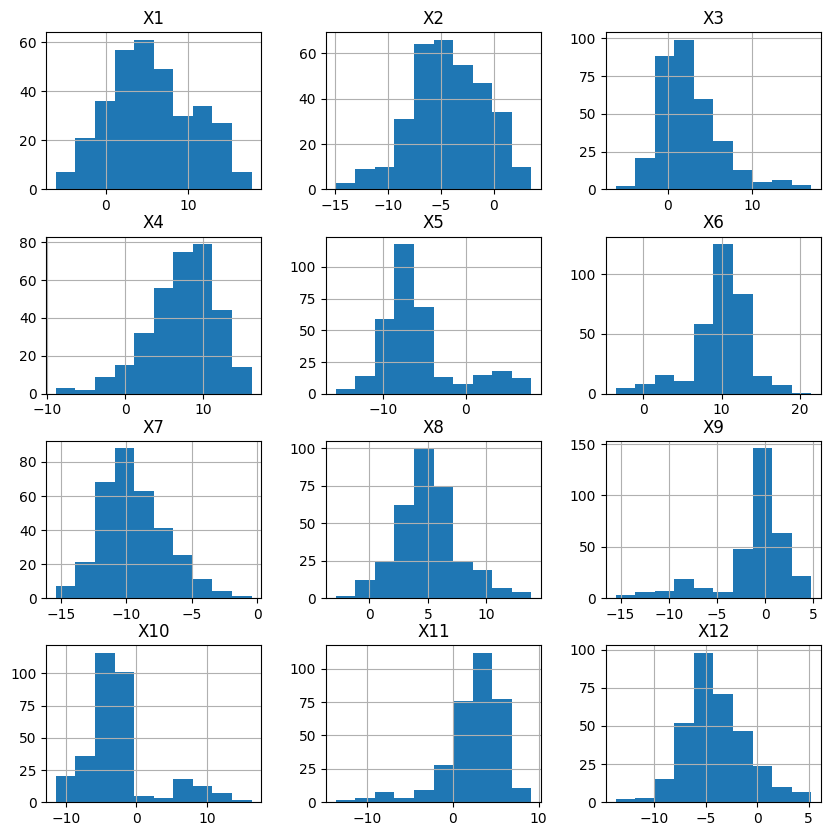

In [122]:
pd.DataFrame.hist(df0,figsize = [10,10])
plt.show()

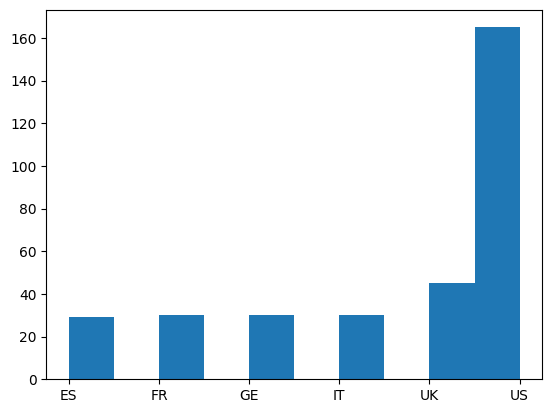

In [123]:
plt.hist(df0['language'])
plt.show()

Drop the rows with NaN values, if any, show the shape of the dataset
after this cleaning .

In [124]:
df0 = df0.dropna(axis=0)
X = df0.drop(columns=['language'], axis=1)
y = df0['language']
print("shape after dropping: {}. Number or rows deleted: {}".format(X.shape, df0.shape[0] - df.shape[0]))

shape after dropping: (321, 12). Number or rows deleted: 0


tune the hyper–parameters of Model1 with Cross Validation on the
training set, optimize for recall_macro . .

In [125]:
# Split in Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , train_size = 0.66
                                                    , random_state = random_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 211 samples in the training dataset
There are 110 samples in the testing dataset
Each sample has 12 features


In [126]:
# I test the Model 1 for the treeClassifier without setting the parameter

from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


estimator = tree.DecisionTreeClassifier()
clf = GridSearchCV(estimator, [{'max_depth': [*range(1, 20)]}], cv=5,
                   scoring='recall_macro',
                   return_train_score=False,
                   n_jobs=2,  # this allows using multi-cores
                   )

clf.fit(X_train, y_train)
print("best parameter estimator :", clf.best_params_)
print("best score for recall: ", clf.best_score_)
print()


best parameter estimator : {'max_depth': 17}
best score for recall:  0.6686507936507935



In [137]:
results = pd.DataFrame(clf.cv_results_)
results[['params','mean_test_score']]

,params,mean_test_score
0,{'max_depth': 1},0.278968
1,{'max_depth': 2},0.307937
2,{'max_depth': 3},0.398413
3,{'max_depth': 4},0.421032
4,{'max_depth': 5},0.560714
5,{'max_depth': 6},0.579762
6,{'max_depth': 7},0.596825
7,{'max_depth': 8},0.590873
8,{'max_depth': 9},0.651587
9,{'max_depth': 10},0.604762


produce a classification report for Model1 on the test set

In [128]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          ES       0.57      0.73      0.64        11
          FR       0.58      0.70      0.64        10
          GE       0.50      0.33      0.40        12
          IT       0.58      0.58      0.58        12
          UK       0.57      0.62      0.59        13
          US       0.78      0.75      0.76        52

    accuracy                           0.66       110
   macro avg       0.60      0.62      0.60       110
weighted avg       0.66      0.66      0.66       110



 produce the confusion matrix for Model1 on the test set . .

Here we can see some important information, combined with the previous f1 score, recall and precision.
[[ 8  0  0  0  0  3]
 [ 2  7  0  1  0  0]
 [ 0  1  4  3  0  4]
 [ 0  0  1  7  2  2]
 [ 0  1  2  0  8  2]
 [ 4  3  1  1  4 39]]

[[0.07272727 0.         0.         0.         0.         0.02727273]
 [0.01818182 0.06363636 0.         0.00909091 0.         0.        ]
 [0.         0.00909091 0.03636364 0.02727273 0.         0.03636364]
 [0.         0.         0.00909091 0.06363636 0.01818182 0.01818182]
 [0.         0.00909091 0.01818182 0.         0.07272727 0.01818182]
 [0.03636364 0.02727273 0.00909091 0.00909091 0.03636364 0.35454545]]


c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


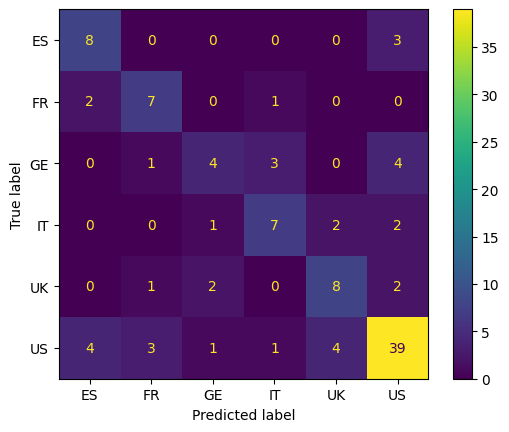

In [129]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf.best_estimator_, X_test, y_true)
print('Here we can see some important information, combined with the previous f1 score, recall and precision.')

conf = confusion_matrix(y_test, y_pred)
print(conf)
print()
print(conf/conf.sum())

tune the hyper–parameters of Model2 with Cross Validation on the
training set, optimize for recall_macro . . .

In [130]:
from sklearn.neighbors import KNeighborsClassifier

estimator2 = KNeighborsClassifier()
clf2 = GridSearchCV(estimator2, [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}], cv=5,
                   scoring='recall_macro',
                   return_train_score=False,
                   n_jobs=2,  # this allows using multi-cores
                   )

clf2.fit(X_train, y_train)
print("best parameter estimator :", clf2.best_params_)
print("best score for recall: ", clf2.best_score_)
print()

best parameter estimator : {'n_neighbors': 2}
best score for recall:  0.7424603174603175



In [136]:
results2 = pd.DataFrame(clf2.cv_results_)
results2[['params','mean_test_score']]

,params,mean_test_score
0,{'n_neighbors': 1},0.732540
1,{'n_neighbors': 2},0.742460
2,{'n_neighbors': 3},0.739286
3,{'n_neighbors': 4},0.695238
4,{'n_neighbors': 5},0.694444
5,{'n_neighbors': 6},0.704365
6,{'n_neighbors': 7},0.651587
7,{'n_neighbors': 8},0.673413
8,{'n_neighbors': 9},0.655952
9,{'n_neighbors': 10},0.625794


produce a classification report for Model2 on the test set

In [138]:
y_true, y_pred2 = y_test, clf2.predict(X_test)
print(classification_report(y_true, y_pred2))

              precision    recall  f1-score   support

          ES       0.83      0.91      0.87        11
          FR       0.62      1.00      0.77        10
          GE       0.53      0.75      0.62        12
          IT       0.67      0.50      0.57        12
          UK       0.60      0.69      0.64        13
          US       0.98      0.77      0.86        52

    accuracy                           0.76       110
   macro avg       0.71      0.77      0.72       110
weighted avg       0.80      0.76      0.77       110



produce the confusion matrix for Model2 on the test set .

c:\Users\david\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Here we can see some important information, combined with the previous f1 score, recall and precision.
[[10  0  0  0  0  1]
 [ 0 10  0  0  0  0]
 [ 0  0  9  2  1  0]
 [ 0  0  5  6  1  0]
 [ 0  2  1  1  9  0]
 [ 2  4  2  0  4 40]]

[[0.09090909 0.         0.         0.         0.         0.00909091]
 [0.         0.09090909 0.         0.         0.         0.        ]
 [0.         0.         0.08181818 0.01818182 0.00909091 0.        ]
 [0.         0.         0.04545455 0.05454545 0.00909091 0.        ]
 [0.         0.01818182 0.00909091 0.00909091 0.08181818 0.        ]
 [0.01818182 0.03636364 0.01818182 0.         0.03636364 0.36363636]]


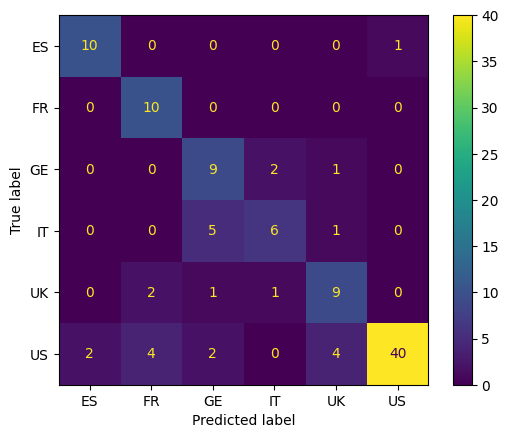

In [140]:
plot_confusion_matrix(clf2.best_estimator_, X_test, y_true)
print('Here we can see some important information, combined with the previous f1 score, recall and precision.')

conf2 = confusion_matrix(y_test, y_pred2)
print(conf2)
print()
print(conf2/conf2.sum())